In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#load modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from astropy import units as u
from astropy.io import fits
from  matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage

# draw the dark hole regions
from skimage.draw import draw

# import personal code
import sys
sys.path.insert(0, '/home/jhen/XWCL/code/MagAOX/functions')
#import magaoxFunctions as mf
import psd_functions as psd
import zernike as zern
import datafiles as dfx

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from datetime import datetime
date_ran = datetime.now()
dr_str = date_ran.strftime("%d/%m/%Y %H:%M:%S")
print('Last date this notebook has been ran: {0}'.format(dr_str))

Last date this notebook has been ran: 24/04/2020 12:24:22


In [51]:
# Let's look at the PSD with all the spots and the median.
# CA 80%

fm_parms = { 'ovs': 4096,
             'surf_units': u.micron,
             'ca': 80}

fits_folder = 'zygo_data/flat_mirrors/fixed_fits/'

fm_num = 8
ntot = 6
fms_80=[]

for n in range(0,ntot):
    # write the step number
    n_step = 'step {0}'.format(n)
    
    # create the object
    t_fm = psd.surfPSD(surf_name = n_step)
    
    # open the files
    file_loc=fits_folder+'flat_2in_ca{0}_n{1}_step{2}_test'.format(fm_parms['ca'], fm_num, n)
    t_fm.open_surf(fileloc=file_loc+'_surf.fits', surf_units = fm_parms['surf_units'])
    t_fm.open_mask(fileloc=file_loc+'_mask.fits')
    # calculate the PSD
    t_fm.calc_psd(oversamp = fm_parms['ovs'])
    print('PSD for {0} complete'.format(n_step))

    # calculate the radial profile
    t_fm.calc_psd_radial(ring_width=5)
    print('Radial profile for {0} complete\n'.format(n_step))
    fms_80.append(t_fm)
    
# generate the median PSD
# create the object
n_step = 'Median surface'
fm_med_80 = psd.surfPSD(surf_name = n_step, oversamp = fm_parms['ovs'])

# load the file
file_loc=fits_folder+'flat_2in_ca{0}_n{1}_median'.format(fm_parms['ca'], fm_num)
fm_med_80.open_surf(fileloc=file_loc+'_surf.fits', surf_units = fm_parms['surf_units'])
fm_med_80.open_mask(fileloc=file_loc+'_mask.fits')
# calculate the PSD
fm_med_80.calc_psd(oversamp = fm_parms['ovs'])
print('PSD for {0} complete'.format(n_step))
fm_med_80.calc_psd_radial(ring_width=5)
print('Radial profile for {0} complete'.format(n_step))

PSD for step 0 complete
Radial profile for step 0 complete


PSD for step 1 complete
Radial profile for step 1 complete


PSD for step 2 complete
Radial profile for step 2 complete


PSD for step 3 complete
Radial profile for step 3 complete


PSD for step 4 complete
Radial profile for step 4 complete


PSD for step 5 complete
Radial profile for step 5 complete




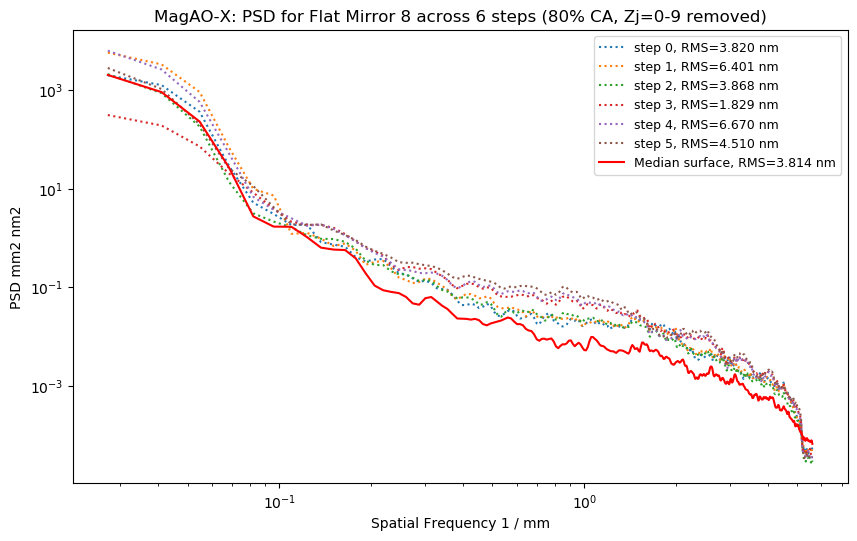

In [54]:
plt.figure(figsize=[10,6],dpi=100)
for obj in fms_80:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, ':', label='{0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med_80.k_radial.value, fm_med_80.psd_radial_cal.value, 'r', label='{0}, RMS={1:.3f}'.format(fm_med_80.surf_name, np.sqrt(fm_med_80.var)))
plt.xlabel('Spatial Frequency {0}'.format(fms_80[0].k_radial.unit))
plt.ylabel('PSD {0}'.format(fms_80[0].psd_radial_cal.unit))
plt.title('MagAO-X: PSD for Flat Mirror 8 across 6 steps ({0}% CA, Zj=0-9 removed)'.format(fm_parms['ca']))
#plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(prop={'size':9})

In [41]:
# calculate quickly the RMS values in the bands
print('RMS calculations (80% CA)')
print('{0:>7} | {1:^12} | {2:^10}'.format('step','mid_high', 'total'))

for n in range(0,ntot):
    # write the step number
    n_step = 'step {0}'.format(n)
    
    # create the object
    t_fm = psd.surfPSD(surf_name = n_step)
    
    # open the files
    file_loc=fits_folder+'flat_2in_ca{0}_n{1}_step{2}_test'.format(fm_parms['ca'], fm_num, n)
    t_fm.open_surf(fileloc=file_loc+'_surf.fits', surf_units = fm_parms['surf_units'])
    t_fm.open_mask(fileloc=file_loc+'_mask.fits')
    # calculate the PSD
    t_fm.calc_psd(oversamp = fm_parms['ovs'])
    #print('PSD for {0} complete'.format(n_step))
    
    # calculate the RMS at mid-high spatial frequencies
    low_rms=t_fm.calc_psd_rms(tgt_low=t_fm.k_min, tgt_high=k_lm)
    mh_rms = t_fm.calc_psd_rms(tgt_low=k_lm, tgt_high=t_fm.k_max)
    
    print('{0:>7} | {1:^9.4} | {2:^10.4}'.format(n,mh_rms, tot_rms))
    
    # calculate the radial profile
    #t_fm.calc_psd_radial(ring_width=5)
    #print('Radial profile for {0} complete\n'.format(n_step))
    #print()
    fms_80.append(t_fm)
    
#print('All FM step PSD complete\n')
# generate the median PSD
# create the object
n_step = 'Median surface'
fm_med_80 = psd.surfPSD(surf_name = n_step, oversamp = fm_parms['ovs'])

# load the file
file_loc=fits_folder+'flat_2in_ca{0}_n{1}_median'.format(ca_resize, fm_num, n)
fm_med_80.open_surf(fileloc=file_loc+'_surf.fits', surf_units = u.micron)
fm_med_80.open_mask(fileloc=file_loc+'_mask.fits')
# calculate the PSD
fm_med_80.calc_psd(oversamp = fm_parms['ovs'])

# calculate the RMS at mid-high spatial frequencies
#print('beyond low rms')
#bl_rms=t_fm.calc_psd_rms(tgt_low=np.min(t_fm.radialFreq), tgt_high=t_fm.k_min, print_rms=False, print_kloc=False)
#print('low RMS')
low_rms=fm_med_80.calc_psd_rms(tgt_low=fm_med_80.k_min, tgt_high=k_lm, print_rms=False, print_kloc=False)
#print('boundary RMS')
#boundary_rms = t_fm.calc_psd_rms(tgt_low=k_lm-t_fm.delta_k, tgt_high=k_lm+t_fm.delta_k, print_rms=False, print_kloc=False)
#print('mid-high RMS')
mh_rms = fm_med_80.calc_psd_rms(tgt_low=k_lm, tgt_high=fm_med_80.k_max, print_rms=False, print_kloc=False)
#print('k_min to k_max RMS')
tot_rms = fm_med_80.calc_psd_rms(tgt_low=fm_med_80.k_min, tgt_high=fm_med_80.k_max, print_rms=False, print_kloc=False)
#tot_rms2 = np.sqrt(t_fm.var)
#sum_rms = low_rms+mh_rms-boundary_rms
#print('RMS k_low (<{0:.3f}): {1:.3f}'.format(k_lm, low_rms))
#print('RMS k_mid_high (>{0:.3f}): {1:.3f} ({2:.2f}% of total RMS)'.format(k_lm, mh_rms, mh_rms/tot_rms*100))
#print('RMS total: {0:.3f} (from variance: {1:.3f}) (from sum: {2:.3f})'.format(tot_rms, tot_rms2,sum_rms))
#print('RMS total: {0:.3f} (full optic RMS: {1:.3f})\n'.format(sum_rms, tot_rms))

print('{0:>7} | {1:^9.4} | {2:^10.4}'.format('median',mh_rms, tot_rms))


RMS calculations (80% CA)
   step |     low      |   mid_high   |   total   
      0 |   3.284   nm |  0.7022   nm |   3.358    nm
      1 |   5.387   nm |  0.7098   nm |   5.434    nm
      2 |   2.886   nm |  0.6806   nm |   2.965    nm
      3 |   1.376   nm |  0.8947   nm |   1.641    nm
      4 |   5.021   nm |  0.8912   nm |    5.1     nm
      5 |   3.254   nm |  0.9784   nm |   3.398    nm
 median |   2.944   nm |  0.4671   nm |   2.981    nm


In [ ]:
# generate the median PSD
# create the object
n_step = 'Median surface'
fm_med_80 = psd.surfPSD(surf_name = n_step, oversamp = fm_parms['ovs'])

# load the file
file_loc=fits_folder+'flat_2in_ca{0}_n{1}_median'.format(ca_resize, fm_num, n)
fm_med_80.open_surf(fileloc=file_loc+'_surf.fits', surf_units = u.micron)
fm_med_80.open_mask(fileloc=file_loc+'_mask.fits')
# calculate the PSD
fm_med_80.calc_psd(oversamp = fm_parms['ovs'])
print('PSD for {0} complete'.format(n_step))

# calculate the RMS at mid-high spatial frequencies
low_rms=t_fm.calc_psd_rms(tgt_low=fm_med_80.k_min, tgt_high=k_lm*0.9) 
mh_rms = t_fm.calc_psd_rms(tgt_low=k_lm, tgt_high=fm_med_80.k_max)
tot_rms = np.sqrt(fm_med_80.var)
sum_rms = low_rms + mh_rms
print('RMS k_low (<{0:.3f}): {1:.3f}'.format(k_lm, low_rms))
print('RMS k_mid_high (>{0:.3f}): {1:.3f}'.format(k_lm, mh_rms))
print('RMS total: {0:.3f} (full optic RMS: {1:.3f})'.format(sum_rms, tot_rms))

# calculate the radial profile
#fm_med_80.calc_psd_radial(ring_width=5)
#print('Radial profile for {0} complete\n'.format(n_step))

In [11]:
# CA 100%

fm_parms = { 'ovs': 4096,
             'diam_100CA': 50*u.mm, # not really useful but okay
             'surf_units': u.micron}

fits_folder = 'flat_mirrors/fixed_fits/'

ca_resize=100
print('Clear Aperture: {0}%'.format(ca_resize))
fm_num = 8
ntot = 6
fms_100=[]
for n in range(0,ntot):
    # write the step number
    n_step = 'step {0}'.format(n)
    
    # create the object
    t_fm = psd.surfPSD(surf_name = n_step, oversamp = fm_parms['ovs'])
    
    # open the files
    file_loc=fits_folder+'flat_2in_ca{0}_n{1}_step{2}'.format(ca_resize, fm_num, n)
    t_fm.open_surf(fileloc=file_loc+'_surf.fits', surf_units = u.micron)
    t_fm.open_mask(fileloc=file_loc+'_mask.fits')
    # calculate the PSD
    t_fm.calc_psd()
    print('PSD for {0} complete'.format(n_step))
    
    # calculate the radial profile
    t_fm.calc_psd_radial(ring_width=5)
    print('Radial profile for {0} complete\n'.format(n_step))
    
    fms_100.append(t_fm)
    
print('All FM step PSD complete\n')

# generate the median PSD
# create the object
n_step = 'Median surface'
fm_med_100 = psd.surfPSD(surf_name = n_step, oversamp = fm_parms['ovs'])

# load the file
file_loc=fits_folder+'flat_2in_ca{0}_n{1}_median'.format(ca_resize, fm_num, n)
fm_med_100.open_surf(fileloc=file_loc+'_surf.fits', surf_units = u.micron)
fm_med_100.open_mask(fileloc=file_loc+'_mask.fits')
# calculate the PSD
fm_med_100.calc_psd()
print('PSD for {0} complete'.format(n_step))

# calculate the radial profile
fm_med_100.calc_psd_radial(ring_width=5)
print('Radial profile for {0} complete\n'.format(n_step))

Clear Aperture: 100%
PSD for step 0 complete
Radial profile for step 0 complete

PSD for step 1 complete
Radial profile for step 1 complete

PSD for step 2 complete
Radial profile for step 2 complete

PSD for step 3 complete
Radial profile for step 3 complete

PSD for step 4 complete
Radial profile for step 4 complete

PSD for step 5 complete
Radial profile for step 5 complete

All FM step PSD complete

PSD for Median surface complete
Radial profile for Median surface complete



In [ ]:
plt.figure(figsize=[10,6],dpi=100)
for obj in fms_80:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, ':', label='{0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med_80.k_radial.value, fm_med_80.psd_radial_cal.value, 'r', label='{0}, RMS={1:.3f}'.format(fm_med_80.surf_name, np.sqrt(fm_med_80.var)))
plt.xlabel('Spatial Frequency {0}'.format(fms[0].k_radial.unit))
plt.ylabel('PSD {0}'.format(fms[0].psd_radial_cal.unit))
plt.title('MagAO-X: PSD for Flat Mirror 8 across 6 steps ({0}% CA, Zj=0-9 removed)'.format(80))
#plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(prop={'size':9})

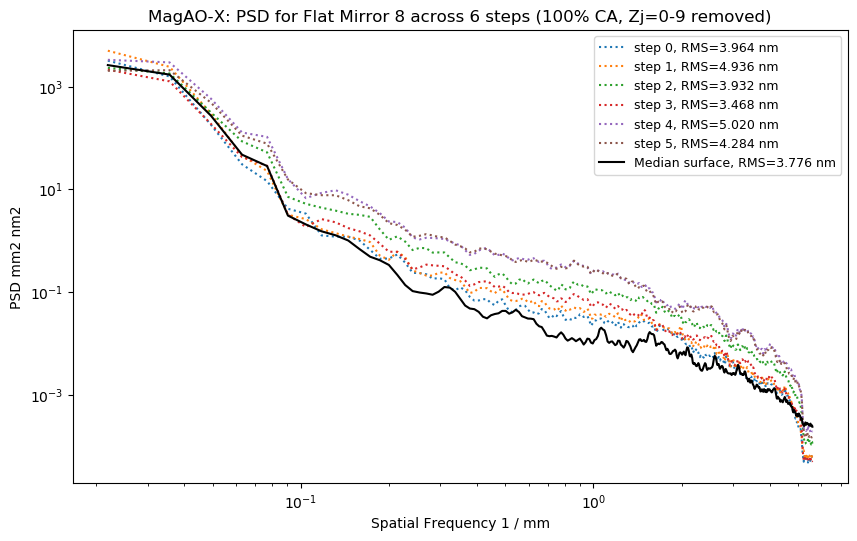

In [18]:
plt.figure(figsize=[10,6],dpi=100)
for obj in fms_100:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, linewidth=0.8, label='{0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med_100.k_radial.value, fm_med_100.psd_radial_cal.value, 'k', label='{0}, RMS={1:.3f}'.format(fm_med_100.surf_name, np.sqrt(fm_med_100.var)))
plt.xlabel('Spatial Frequency {0}'.format(fms[0].k_radial.unit))
plt.ylabel('PSD {0}'.format(fms[0].psd_radial_cal.unit))
plt.title('MagAO-X: PSD for Flat Mirror 8 across 6 steps ({0}% CA, Zj=0-9 removed)'.format(100))
#plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(prop={'size':9})

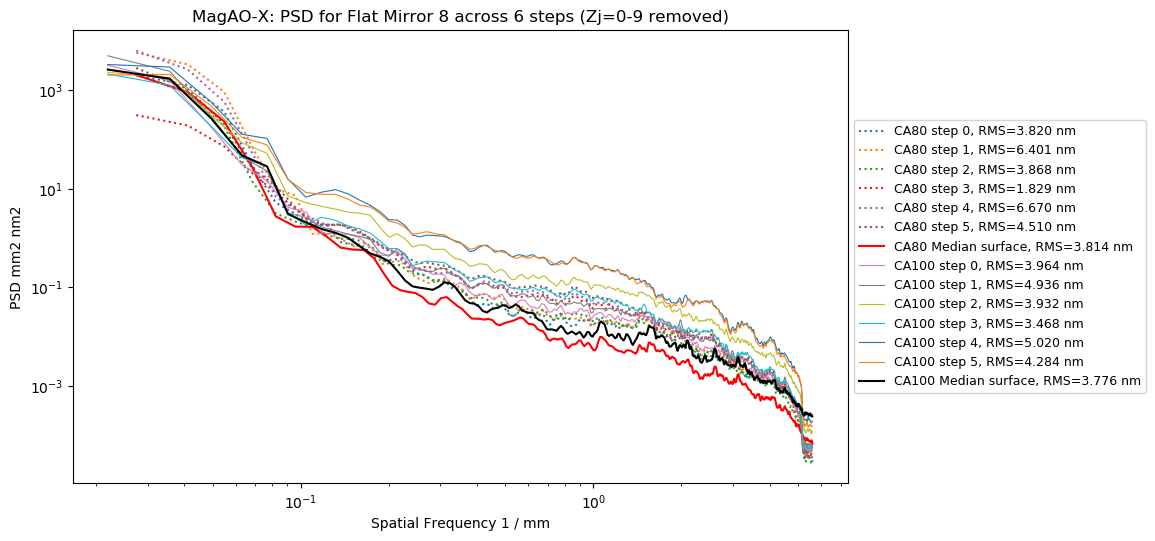

In [26]:
plt.figure(figsize=[10,6],dpi=100)
for obj in fms_80:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, ':', label='CA80 {0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med_80.k_radial.value, fm_med_80.psd_radial_cal.value, 'r', label='CA80 {0}, RMS={1:.3f}'.format(fm_med_80.surf_name, np.sqrt(fm_med_80.var)))

for obj in fms_100:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, linewidth=0.8, label='CA100 {0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med_100.k_radial.value, fm_med_100.psd_radial_cal.value, 'k', label='CA100 {0}, RMS={1:.3f}'.format(fm_med_100.surf_name, np.sqrt(fm_med_100.var)))

plt.xlabel('Spatial Frequency {0}'.format(fms_80[0].k_radial.unit))
plt.ylabel('PSD {0}'.format(fms_80[0].psd_radial_cal.unit))
plt.title('MagAO-X: PSD for Flat Mirror 8 across 6 steps (Zj=0-9 removed)')
plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(prop={'size':9})

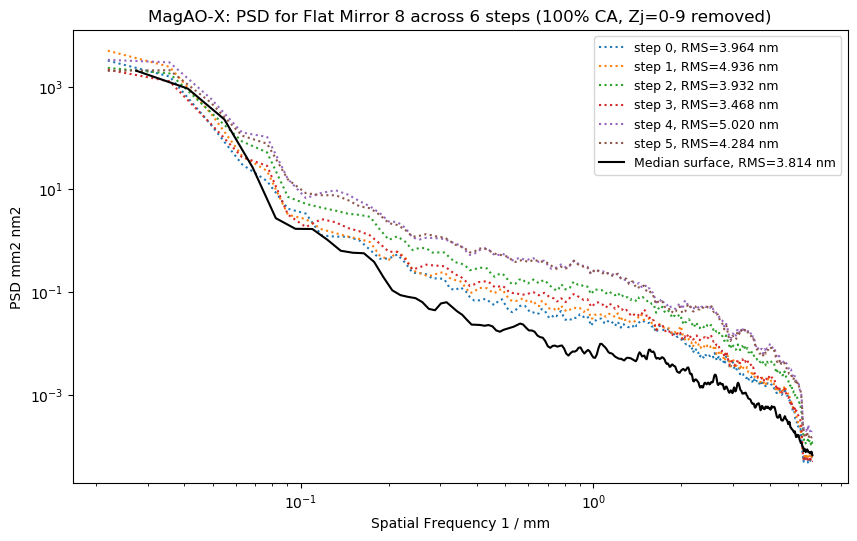

In [13]:
plt.figure(figsize=[10,6],dpi=100)
for obj in fms_80:
    plt.loglog(obj.k_radial.value, obj.psd_radial_cal.value, ':', label='CA80{0}, RMS={1:.3f}'.format(obj.surf_name, np.sqrt(obj.var)))
plt.loglog(fm_med.k_radial.value, fm_med.psd_radial_cal.value, 'k', label='{0}, RMS={1:.3f}'.format(fm_med.surf_name, np.sqrt(fm_med.var)))
plt.xlabel('Spatial Frequency {0}'.format(fms[0].k_radial.unit))
plt.ylabel('PSD {0}'.format(fms[0].psd_radial_cal.unit))
plt.title('MagAO-X: PSD for Flat Mirror 8 across 6 steps ({0}% CA, Zj=0-9 removed)'.format(100))
#plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(prop={'size':9})

In [25]:
# LSF the medians
la80, lb80 = psd.solve_model_lsf(fm_med_80.psd_radial_cal, fm_med_80.k_radial)
la100, lb100 = psd.solve_model_lsf(fm_med_100.psd_radial_cal, fm_med_100.k_radial)
# Apply model
p_lsf_80 = psd.calc_model_simple(fm_med_80.k_radial, la80, lb80)
p_lsf_100 = psd.calc_model_simple(fm_med_100.k_radial, la100, lb100)

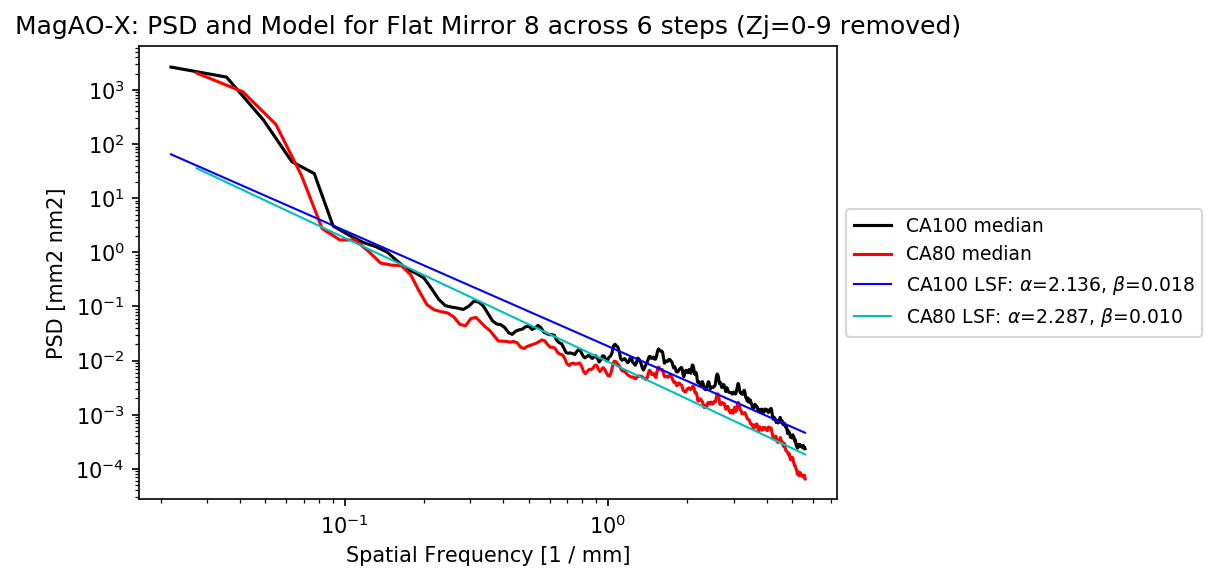

In [28]:
# check the plots
plt.figure(dpi=150)
plt.loglog(fm_med_100.k_radial, fm_med_100.psd_radial_cal, 'k', linewidth=1.5, label='CA100 median')
plt.loglog(fm_med_80.k_radial, fm_med_80.psd_radial_cal, 'r', linewidth=1.5, label='CA80 median')
plt.loglog(fm_med_100.k_radial, p_lsf_100, 'b', linewidth=1,
           label='CA100 LSF: {0}={1:.3f}, {2}={3:.3f}'.format(r'$\alpha$', la100, r'$\beta$', lb100.value))
plt.loglog(fm_med_80.k_radial, p_lsf_80, 'c', linewidth=1,
           label='CA80 LSF: {0}={1:.3f}, {2}={3:.3f}'.format(r'$\alpha$', la80, r'$\beta$', lb80.value))
plt.xlabel('Spatial Frequency [{0}]'.format(fm_med_100.k_radial.unit))
plt.ylabel('PSD [{0}]'.format(fm_med_100.psd_radial_cal.unit))
plt.title('MagAO-X: PSD and Model for Flat Mirror 8 across 6 steps (Zj=0-9 removed)')
plt.legend(prop={'size':9},loc='center left', bbox_to_anchor=(1, 0.5))